In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
import keras

np.random.seed(0)
tf.random.set_seed(0)

rootPath = "C:\\Users\\tiger\\Deeplearning\\images\\apple vs orange"

ImageDataGenerator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=20,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        brightness_range=[.2, .2],
                                        validation_split=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

In [2]:
print(len(os.listdir('./images/apple vs orange/train/apple')))
print(len(os.listdir('./images/apple vs orange/train/orange')))

1000
1000


In [3]:
trainGen = ImageDataGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(128,128),
    class_mode='binary',
    subset='training')

validationGen = ImageDataGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(128,128),
    class_mode='binary',
    subset='validation')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [4]:
for data_batch, labels_batch in trainGen:
    print("Data 크기 : ", data_batch.shape)
    print("Batch 크기 : ", labels_batch.shape)
    break
    
for data_batch, labels_batch in validationGen:
    print("Data 크기 : ", data_batch.shape)
    print("Batch 크기 : ", labels_batch.shape)
    break

Data 크기 :  (32, 128, 128, 3)
Batch 크기 :  (32,)
Data 크기 :  (32, 128, 128, 3)
Batch 크기 :  (32,)


In [9]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.3f}-{val_accuracy:.3f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(patience=5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

 steps_per_epoch: 정수 혹은 None. 한 세대의 종료를 선언하고 다음 세대를 시작하기까지 단계(샘플 배치)의 총 개수. 텐서플로우 데이터 텐서와 같은 인풋 텐서로 학습하는 경우, 디폴트 값인 None은 데이터셋의 샘플 수를 배치 크기로 나눈 값을 갖거나, 그런 값이 확정될 수 없는 경우 1의 값이 됩니다. - validation_steps: steps_per_epoch이 특정된 경우에만 유의미합니다. 정지 전 검증할 단계(샘플 배치)의 총 개수입니다.

In [15]:
epochs=100

history = model.fit(trainGen, validation_data=validationGen, steps_per_epoch=10, epochs=epochs,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.1742 - accuracy: 0.9375
Epoch 00001: val_loss did not improve from 0.19401
10/10 [==============================] - 7s 656ms/step - loss: 0.1742 - accuracy: 0.9375 - val_loss: 0.1965 - val_accuracy: 0.9150
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.1881 - accuracy: 0.9281
Epoch 00002: val_loss did not improve from 0.19401
10/10 [==============================] - 6s 630ms/step - loss: 0.1881 - accuracy: 0.9281 - val_loss: 0.2317 - val_accuracy: 0.8975
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.1470 - accuracy: 0.9469
Epoch 00003: val_loss did not improve from 0.19401
10/10 [==============================] - 7s 669ms/step - loss: 0.1470 - accuracy: 0.9469 - val_loss: 0.2596 - val_accuracy: 0.9000
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.3176 - accuracy: 0.8938
Epoch 00004: val_loss improved from 0.19401 to 0.19367, saving model to ./

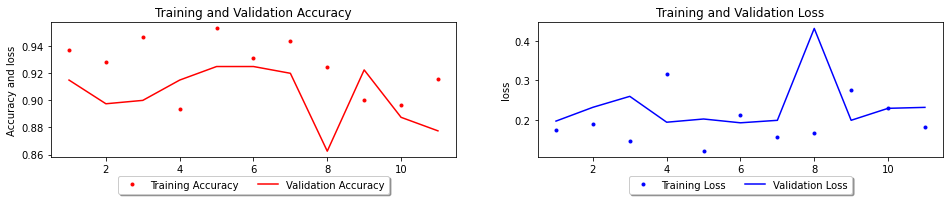

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 1))
plt.subplot(121)
plt.subplots_adjust(top=2)
plt.plot(epochs, acc, 'r.', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and loss')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)


plt.subplot(122)
plt.plot(epochs, loss, 'b.', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

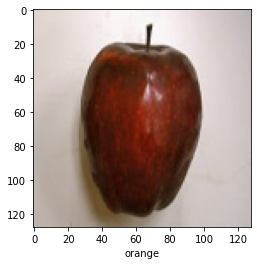

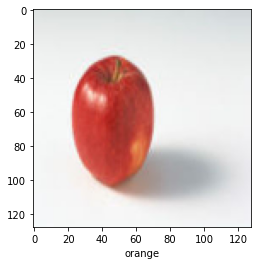

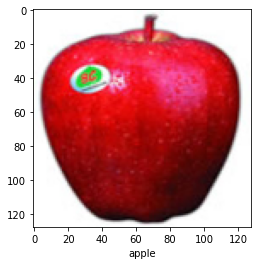

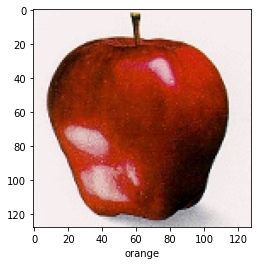

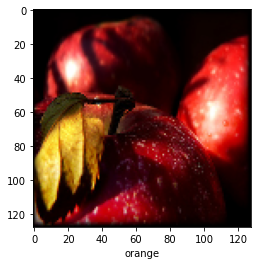

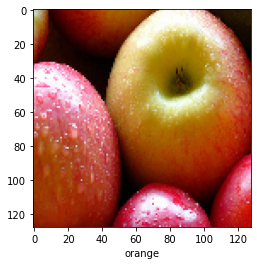

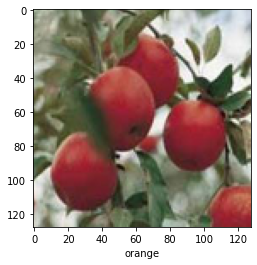

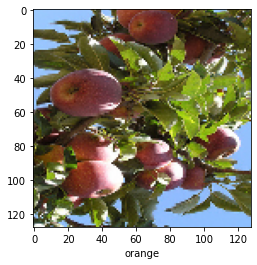

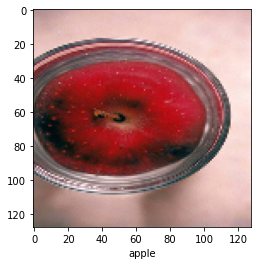

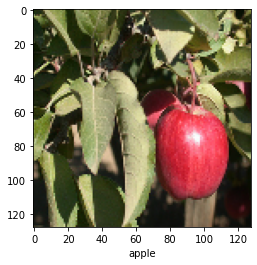

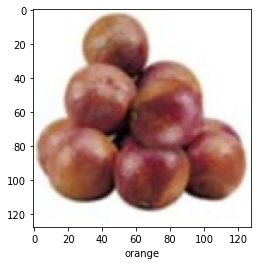

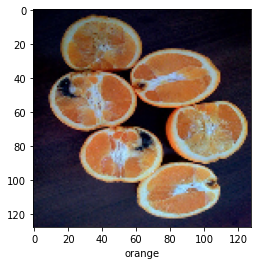

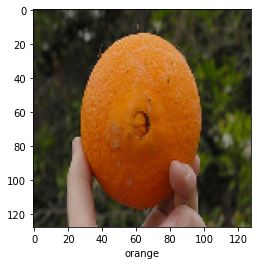

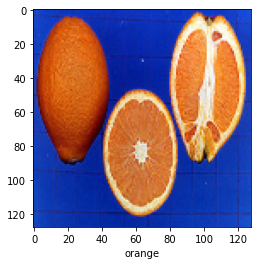

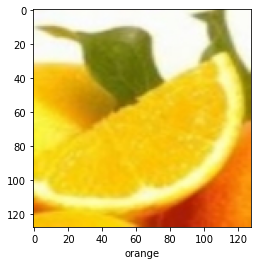

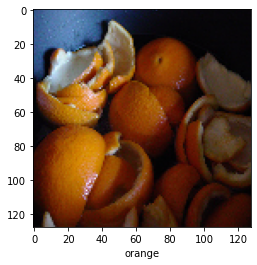

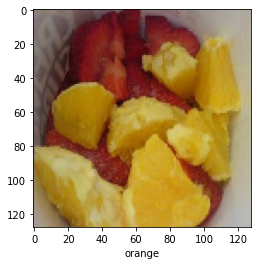

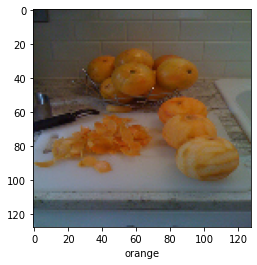

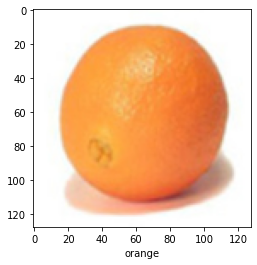

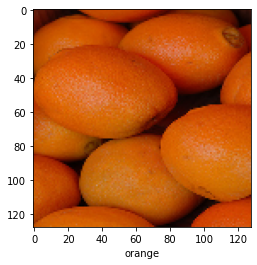

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('./model/06-0.192-0.925.hdf5')

model.summary()


cls_index = ['Apple','Orange']

n = 20

test_num = [[0]*n for _ in range(n)]

for i in range(10): 
    f_name = 'apple (' + str(i+1) + ')'
    file_path = './images/apple vs orange/test/apple/'+f_name+'.jpg'
    print(file_path)
    test_num[i] = image.load_img(file_path, target_size = (128,128))
    
for i in range(10,20): 
    f_name = 'orange (' + str(i+9) + ')'
    file_path = './images/apple vs orange/test/orange/'+f_name+'.jpg'
    print(file_path)
    test_num[i] = image.load_img(file_path, target_size = (128,128)) 
    
for i in range(20):
    plt.figure()
    plt.imshow(test_num[i])
    
    test_num[i] = image.img_to_array(test_num[i])
    test_num[i] = np.expand_dims(test_num[i], axis=0)
    result = model.predict_classes(test_num[i])
    
    if result == 0:
        strName = "apple"
    else:
        strName = "orange"
    plt.xlabel(strName)
    
    if i < 10:
        if result == 0:
            print("apple : 예측 = apple")
        else:
            print("apple : 예측 = orange")
    else:
        if result == 0:
            print("orange : 예측 = apple")
        else:
            print("orange : 예측 = orange")
    